In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Global_Superstore2.csv",encoding="latin-1")

In [3]:
data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium


In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
data.groupby("Country")[['Sales', 'Quantity']].sum().sort_values(ascending=False, by= 'Sales').head(5).astype('int64')

,Sales,Quantity
Country,,
United States,2297200,37873
Australia,925235,10673
France,858931,10804
China,700562,7081
Germany,628840,7745


In [6]:
data.Segment.value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [7]:
data.shape

(51290, 24)

In [8]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
data['Postal Code'] = data['Postal Code'].fillna(0)

In [10]:
data.groupby(["City"])["Sales"].sum().sort_values(ascending=False).head(5)

City
New York City    256368.1610
Los Angeles      175851.3410
Manila           120886.9485
Seattle          119540.7420
San Francisco    112669.0920
Name: Sales, dtype: float64

In [11]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [12]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [13]:
data.groupby('City')[['Sales', 'Quantity']].sum().sort_values(by='Sales', ascending=False).head(5)

,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Manila,120886.9485,1661
Seattle,119540.7420,1590
San Francisco,112669.0920,1935


In [14]:
data.shape

(51290, 24)

Q1️⃣ (Date Handling + Feature Engineering)
Convert Order Date to datetime and create two new columns:
Order_Year
Order_Month
Then display the first 5 rows with:
Order Date
Order_Year
Order_Month

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='ignore')

C:\Users\Kartik\AppData\Local\Temp\ipykernel_10380\2961333566.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='ignore')
C:\Users\Kartik\AppData\Local\Temp\ipykernel_10380\2961333566.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='ignore')


In [16]:
data['Order Year'] = data['Order Date'].dt.year

In [17]:
data['Order Month'] = data['Order Date'].dt.month

In [18]:
data[['Order Date', 'Order Year', 'Order Month']]

,Order Date,Order Year,Order Month
0,2012-07-31,2012,7
1,2013-02-05,2013,2
2,2013-10-17,2013,10
3,2013-01-28,2013,1
4,2013-11-05,2013,11
...,...,...,...
51285,2014-06-19,2014,6
51286,2014-06-20,2014,6
51287,2013-12-02,2013,12
51288,2012-02-18,2012,2


Q2️⃣ (GroupBy + Aggregation)
Find the total Sales and total Profit for each Category.
Sort the result by total Sales in descending order.

In [19]:
data.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).astype('int64')

,Sales,Profit
Category,,
Technology,4744557,663778
Furniture,4110874,285204
Office Supplies,3787070,518473


Q3️⃣ (Advanced Filtering + Boolean Indexing)
Find all orders where:
Region = "Central"
Discount > 0.3
Profit < 0

Display:
Order ID
Category
Sub-Category
Sales
Discount
Profit

In [20]:
data[(data['Region'] == 'Central') & (data['Discount'] > 0.3) & (data['Profit'] < 0)] [['Order ID','Category','Sub-Category','Sales','Discount','Profit']]

,Order ID,Category,Sub-Category,Sales,Discount,Profit
109,IT-2013-5208514,Furniture,Chairs,2570.8650,0.50,-2211.1650
111,ES-2012-2314672,Technology,Phones,2875.7700,0.50,-1783.0800
150,IT-2011-3675195,Office Supplies,Appliances,1983.1350,0.50,-1784.8950
156,CA-2013-108987,Furniture,Bookcases,2396.2656,0.32,-317.1528
182,IT-2011-5629016,Furniture,Tables,2228.6355,0.35,-754.4145
...,...,...,...,...,...,...
51242,CA-2012-153073,Furniture,Furnishings,17.4960,0.60,-7.4358
51256,US-2014-156356,Office Supplies,Binders,2.8960,0.80,-4.7784
51258,CA-2011-103492,Office Supplies,Binders,0.8980,0.80,-1.5715
51276,US-2014-155299,Office Supplies,Appliances,1.6240,0.80,-4.4660


Q4️⃣ (Top-N Analysis – IMPORTANT)
Find the top 5 products (Product Name) that generated the highest total Sales across all orders.

In [21]:
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

Product Name
Apple Smart Phone, Full Size             86935.7786
Cisco Smart Phone, Full Size             76441.5306
Motorola Smart Phone, Full Size          73156.3030
Nokia Smart Phone, Full Size             71904.5555
Canon imageCLASS 2200 Advanced Copier    61599.8240
Name: Sales, dtype: float64

Q5️⃣ (Business Insight – GroupBy + Multiple Aggregations)
For each Ship Mode, calculate:
Average Shipping Cost
Total Sales
Total Profit
Then sort by total Profit (descending).

In [22]:
data.groupby('Ship Mode').agg({
    'Shipping Cost': 'mean',
    'Sales':'sum',
    'Profit':'sum'
}).sort_values(by='Profit',ascending=False)

,Shipping Cost,Sales,Profit
Ship Mode,,,
Standard Class,19.971755,7.578652e+06,890596.02120
Second Class,30.469747,2.565672e+06,292583.52708
First Class,41.053065,1.830976e+06,208104.67520
Same Day,42.937453,6.672020e+05,76173.06780


Q1️⃣ (Date Logic + Filtering)
Find all orders where:
Order Date is in 2019
Ship Date is after Order Date
Order Priority = "High"
Show:
Order ID
Order Date
Ship Date
Order Priority

In [23]:
data[(data['Order Year'] == 2014) & (data['Order Priority'] == 'High')] [['Order ID','Order Date','Ship Date','Order Priority']]

,Order ID,Order Date,Ship Date,Order Priority
19,TZ-2014-8190,2014-12-05,07-12-2014,High
37,US-2014-168116,2014-11-05,05-11-2014,High
38,ES-2014-2637201,2014-01-14,18-01-2014,High
41,IN-2014-37320,2014-11-11,15-11-2014,High
47,IN-2014-50473,2014-08-28,29-08-2014,High
...,...,...,...,...
51237,CA-2014-140963,2014-06-11,14-06-2014,High
51250,MX-2014-113327,2014-12-22,24-12-2014,High
51274,MX-2014-162803,2014-09-11,12-09-2014,High
51281,MX-2014-169530,2014-06-09,11-06-2014,High


In [24]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order Year',
       'Order Month'],
      dtype='object')

Q2️⃣ (GroupBy + Margin Calculation — REAL BUSINESS)
For each Category, calculate:
Total Sales
Total Profit
Profit Margin (%) → (Total Profit / Total Sales) * 100
Sort by Profit Margin descending.

In [25]:
data.groupby('Category').agg({
    'Sales':'sum',
    'Profit':'sum'
}).sort_values(by='Sales', ascending=False)

,Sales,Profit
Category,,
Technology,4.744557e+06,663778.73318
Furniture,4.110874e+06,285204.72380
Office Supplies,3.787070e+06,518473.83430


Q3️⃣ (Multi-column GroupBy + Sorting)
Find total Sales and total Quantity for:
Each Region
Each Segment
Sort by total Sales (descending).

In [26]:
data.groupby(['Region','Segment'])[['Sales','Quantity']].sum().sort_values(by='Sales',ascending=False).astype('int64')

Sales  Quantity
Region         Segment                       
Central        Consumer     1479981     21655
               Corporate     850363     12516
South          Consumer      824890     13115
North          Consumer      643955      9214
Oceania        Consumer      579550      6784
South          Corporate     496014      7648
Central        Home Office   491957      7591
Southeast Asia Consumer      460752      6269
Africa         Consumer      423766      5503
North Asia     Consumer      407394      4426
EMEA           Consumer      406745      5871
North          Corporate     394226      5726
Central Asia   Consumer      369055      3935
West           Consumer      362880      6477
East           Consumer      350908      5347
Oceania        Corporate     322826      3789
South          Home Office   280002      4443
North Asia     Corporate     265747      2701
Southeast Asia Corporate     254351      3350
EMEA           Corporate     250571      3515
Central Asia   Corporate     235540      2302
West           Corporate     225855      3630
North          Home Office   209984      3081
Africa         Corporate     204938      2943
East           Corporate     200409      3358
Oceania        Home Office   197807      2265
North Asia     Home Office   175167      1724
Southeast Asia Home Office   169318      2203
Caribbean      Consumer      162349      3107
Africa         Home Office   155067      2118
EMEA           Home Office   148844      2131
Central Asia   Home Office   148230      1478
West           Home Office   136721      2159
East           Home Office   127463      1913
Caribbean      Corporate     104537      1864
               Home Office    57393      1328
Canada         Consumer       35719       454
               Corporate      19313       223
               Home Office    11895       156

Q4️⃣ (Top-N per Group — INTERVIEW CLASSIC)
For each Category, find the top 3 Sub-Categories by total Profit.

In [27]:
data.groupby(['Category','Sub-Category'])['Profit'].sum().groupby('Category').head(3)

Category         Sub-Category
Furniture        Bookcases       161924.41950
                 Chairs          140396.26750
                 Furnishings      46967.42550
Office Supplies  Appliances      141680.58940
                 Art              57953.91090
                 Binders          72449.84600
Technology       Accessories     129626.30620
                 Copiers         258567.54818
                 Machines         58867.87300
Name: Profit, dtype: float64

Q5️⃣ (Advanced Filtering + isin)
Find all orders where:
Ship Mode is either "First Class" or "Same Day"
Discount is between 0.2 and 0.5
Profit is negative
Display:
Order ID
Ship Mode
Discount
Profit

In [28]:
data[((data['Ship Mode'] == "First Class") | (data['Ship Mode'] == 'Same Day')) & (data['Discount'].between(0.2,0.5)) & (data['Profit'] < 0)] [['Order ID','Ship Mode','Discount','Profit']]

,Order ID,Ship Mode,Discount,Profit
32,CA-2012-139731,Same Day,0.30,-350.4900
37,US-2014-168116,Same Day,0.50,-3839.9904
73,IN-2014-30110,First Class,0.47,-452.8104
109,IT-2013-5208514,Same Day,0.50,-2211.1650
111,ES-2012-2314672,Same Day,0.50,-1783.0800
...,...,...,...,...
50429,IT-2011-5134922,First Class,0.50,-0.1050
50649,IT-2014-5878187,First Class,0.50,-4.9200
50960,IN-2014-19274,First Class,0.47,-4.1442
51160,US-2012-119648,First Class,0.40,-1.4760


In [29]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order Year',
       'Order Month'],
      dtype='object')

Q1️⃣ (Date Handling + Time Gap Analysis)
Create a new column called Shipping_Days that shows the number of days between:
Ship Date − Order Date
Then display:
Order ID
Order Date
Ship Date
Shipping_Days

In [30]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

C:\Users\Kartik\AppData\Local\Temp\ipykernel_10380\2638476873.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')


In [31]:
data['Shipping_Days'] = (data['Ship Date'] - data['Order Date'])

In [32]:
data[['Order ID','Order Date','Ship Date','Shipping_Days']]

,Order ID,Order Date,Ship Date,Shipping_Days
0,CA-2012-124891,2012-07-31,2012-07-31,0 days
1,IN-2013-77878,2013-02-05,2013-02-07,2 days
2,IN-2013-71249,2013-10-17,2013-10-18,1 days
3,ES-2013-1579342,2013-01-28,2013-01-30,2 days
4,SG-2013-4320,2013-11-05,2013-11-06,1 days
...,...,...,...,...
51285,IN-2014-62366,2014-06-19,2014-06-19,0 days
51286,US-2014-102288,2014-06-20,2014-06-24,4 days
51287,US-2013-155768,2013-12-02,2013-12-02,0 days
51288,MX-2012-140767,2012-02-18,2012-02-22,4 days


Q2️⃣ (GroupBy + Ranking — VERY COMMON)
Find the top 3 Regions by total Sales.
Display:
Region
Total Sales

In [33]:
data.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(3).astype('int64')

Region
Central    2822302
South      1600907
North      1248165
Name: Sales, dtype: int64

Q3️⃣ (Conditional Column — Business Logic)
Create a new column called Profit_Status:
Profit > 0 → "Profitable"
Profit = 0 → "Break Even"
Profit < 0 → "Loss"

In [34]:
import numpy as np
data['Profit_Status'] = np.where(data['Profit'] > 0, 'Profitable',
                                 np.where(data['Profit'] == 0, 'Break Even',
                                          np.where(data['Profit'] < 0, 'Loss','dont know')))

In [35]:
data['Profit_Status']

0        Profitable
1              Loss
2        Profitable
3              Loss
4        Profitable
            ...    
51285    Profitable
51286          Loss
51287    Profitable
51288    Profitable
51289    Profitable
Name: Profit_Status, Length: 51290, dtype: object

Q4️⃣ (Multi-condition Filtering + Sorting)
Find all orders where:
Category = "Technology"
Quantity ≥ 3
Profit < 0

Sort the result by Sales (descending) and show:
Order ID
Product Name
Quantity
Sales
Profit

In [36]:
data[(data['Category'] == 'Technology') & (data['Quantity'] >= 3) & (data['Profit'] < 0)].sort_values(by='Sales', ascending=False) [['Order ID', 'Product Name', 'Quantity', 'Sales', 'Profit']]

,Order ID,Product Name,Quantity,Sales,Profit
12887,CA-2011-145317,Cisco TelePresence System EX90 Videoconferenci...,6,22638.480,-1811.0784
344,CA-2011-139892,Lexmark MX611dhe Monochrome Laser Printer,8,8159.952,-1359.9920
37,US-2014-168116,Cubify CubeX 3D Printer Triple Head Print,4,7999.980,-3839.9904
4605,IT-2013-4602742,"Samsung Smart Phone, VoIP",10,5726.160,-445.4400
171,CA-2013-108196,Cubify CubeX 3D Printer Double Head Print,5,4499.985,-6599.9780
...,...,...,...,...,...
41777,US-2011-162012,"Memorex Mouse, Erganomic",3,20.784,-12.5160
40792,CA-2014-117394,Kingston Digital DataTraveler 8GB USB 2.0,4,19.040,-1.4280
42530,US-2013-131114,Kingston Digital DataTraveler 8GB USB 2.0,4,19.040,-1.4280
44302,CA-2013-113733,Imation 30456 USB Flash Drive 8GB,3,16.560,-2.4840


Q5️⃣ (GroupBy + Percentage Contribution)
For each Category, calculate:
Total Sales
Sales Percentage Contribution to overall sales

In [37]:
grouped_data_category = data.groupby('Category')['Sales'].sum().astype('int64').reset_index()

In [38]:
grouped_data_category

,Category,Sales
0,Furniture,4110874
1,Office Supplies,3787070
2,Technology,4744557


In [39]:
grouped_data_category

,Category,Sales
0,Furniture,4110874
1,Office Supplies,3787070
2,Technology,4744557


In [40]:
grouped_data_category = data.groupby('Category')['Sales'].sum().reset_index()

grouped_data_category['Sales_Percentage'] = (
    grouped_data_category['Sales'] / grouped_data_category['Sales'].sum()
) * 100

grouped_data_category 

,Category,Sales,Sales_Percentage
0,Furniture,4.110874e+06,32.516303
1,Office Supplies,3.787070e+06,29.955069
2,Technology,4.744557e+06,37.528628


Q6️⃣ (Top-N per Group — Repeat Pattern)
For each Region, find the top 2 Products by total Profit.

In [41]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order Year',
       'Order Month', 'Shipping_Days', 'Profit_Status'],
      dtype='object')

In [42]:
data.groupby(['Region','Product Name'])['Profit'].sum().sort_values(ascending=False).groupby('Region').head(2)

Region          Product Name                                                               
East            Canon imageCLASS 2200 Advanced Copier                                          10079.9712
Central         Canon imageCLASS 2200 Advanced Copier                                           8399.9760
West            Canon imageCLASS 2200 Advanced Copier                                           6719.9808
South           Hoover Stove, Red                                                               6537.0600
North           Nokia Smart Phone, Full Size                                                    6319.7100
North Asia      Samsung Smart Phone, VoIP                                                       5611.4100
Central         Nokia Smart Phone, Full Size                                                    5174.5455
South           Hamilton Beach Stove, Silver                                                    4540.1400
North           Cisco Smart Phone, Full Size                

Q7️⃣ (Outlier / Risk Analysis — Interview Favorite)
Identify Sub-Categories where:
Average Discount > 0.3
Average Profit < 0

Display:
Sub-Category
Avg Discount
Avg Profit

In [43]:
data[(data['Discount'].mean() > 0.1) & (data['Profit'] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Shipping_Days,Profit_Status
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,2 days,Loss
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,2 days,Loss
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,4297.644,13,0.4,-1862.3124,865.74,Critical,2012,1,3 days,Loss
30,220,US-2011-128776,2011-12-28,2011-12-30,Second Class,RR-19525,Rick Reed,Corporate,Santo Domingo,Santo Domingo,...,1696.640,5,0.2,-148.4600,704.06,Critical,2011,12,2 days,Loss
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,2453.430,5,0.3,-350.4900,690.42,High,2012,10,0 days,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51276,31558,US-2014-155299,2014-06-09,2014-06-13,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,1.624,2,0.8,-4.4660,0.02,Medium,2014,6,4 days,Loss
51278,43818,NI-2011-4700,2011-09-08,2011-09-10,Second Class,PO-8865,Patrick O'Donnell,Consumer,Lagos,Lagos,...,5.364,1,0.7,-6.4560,0.02,High,2011,9,2 days,Loss
51279,46231,ZI-2011-4350,2011-03-21,2011-03-26,Standard Class,AS-285,Alejandro Savely,Corporate,Harare,Harare,...,9.612,2,0.7,-21.1680,0.02,Medium,2011,3,5 days,Loss
51280,46582,TU-2014-6730,2014-11-29,2014-11-30,First Class,KF-6285,Karen Ferguson,Home Office,Midyat,Mardin,...,34.128,6,0.6,-49.5720,0.02,Medium,2014,11,1 days,Loss


In [44]:
data['Discount'].mean()

np.float64(0.14290754533047378)

In [45]:
subcat_summary = data.groupby('Sub-Category').agg({
    'Discount': 'mean',
    'Profit': 'mean'
})

In [46]:
subcat_summary[
    (subcat_summary['Discount'] > 0.3) &
    (subcat_summary['Profit'] < 0)
]

,Discount,Profit
Sub-Category,,


In [47]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Shipping_Days,Profit_Status
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,0 days,Profitable
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,2 days,Loss


In [48]:
data[(data['Segment'] == "Corporate") & (data['City'] == 'New York City') & (data['Sales'] > 500) & (data['Quantity'] > 5)] [['Segment','City','Sales','Quantity']].sort_values(by='Quantity',ascending=False)

,Segment,City,Sales,Quantity
7623,Corporate,New York City,547.300,13
2228,Corporate,New York City,1979.890,11
1846,Corporate,New York City,599.900,10
1637,Corporate,New York City,899.910,9
847,Corporate,New York City,1087.936,8
755,Corporate,New York City,2504.740,7
1440,Corporate,New York City,1085.420,7
2823,Corporate,New York City,706.860,7
3433,Corporate,New York City,887.103,7
2950,Corporate,New York City,1579.746,7


In [49]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Shipping_Days,Profit_Status
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,0 days,Profitable
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,2 days,Loss


<Axes: title={'center': 'Profit Status'}, ylabel='count'>

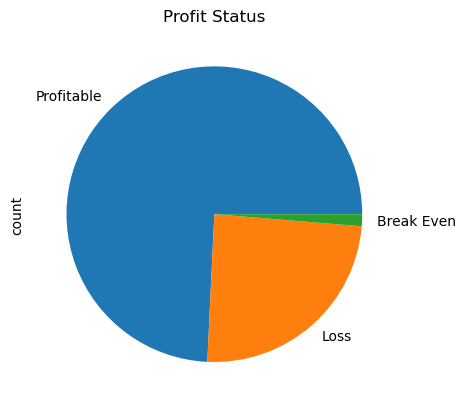

In [50]:
data.Profit_Status.value_counts().plot(kind='pie',title="Profit Status")

In [51]:
data.groupby(['Order Year','Order Month'])['Sales'].sum()

Order Year  Order Month
2011        1               98898.48886
            2               91152.15698
            3              145729.36736
            4              116915.76418
            5              146747.83610
            6              215207.38022
            7              115510.41912
            8              207581.49122
            9              290214.45534
            10             199071.26404
            11             298496.53752
            12             333925.73460
2012        1              135780.72024
            2              100510.21698
            3              163076.77116
            4              161052.26952
            5              208364.89124
            6              256175.69842
            7              145236.78512
            8              303142.94238
            9              289389.16564
            10             252939.85020
            11             323512.41690
            12             338256.96660
2013        1   

In [52]:
sales_per_year = (data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index())

In [53]:
sales_per_year.sort_values(by=['Order Year','Sales'], ascending=[True,False])

,Order Year,Order Month,Sales
11,2011,12,333925.73460
10,2011,11,298496.53752
8,2011,9,290214.45534
5,2011,6,215207.38022
7,2011,8,207581.49122
9,2011,10,199071.26404
4,2011,5,146747.83610
2,2011,3,145729.36736
3,2011,4,116915.76418
6,2011,7,115510.41912


In [54]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Order Year        0
Order Month       0
Shipping_Days     0
Profit_Status     0
dtype: int64

In [55]:
data.duplicated().sum()

np.int64(0)

In [56]:
data[data.duplicated(keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Shipping_Days,Profit_Status
